In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('D:\learning\stats\hypothesis testing\yellow_tripdata_2020-01.csv')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(6339567, 18)

In [8]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [9]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [10]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [11]:
df['payment_type']=df['payment_type'].astype('int64')
df['passenger_count']=df['passenger_count'].astype('int64')
df.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                    int64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
duration                 timedelta64[ns]
dtype: object

In [82]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.596105
2    0.210249
3    0.076991
5    0.074708
4    0.041947
Name: proportion, dtype: float64

In [81]:
df['payment_type'].value_counts(normalize=True)

payment_type
Card    0.673238
Cash    0.326762
Name: proportion, dtype: float64

In [89]:
df=df[df['passenger_count']<4]
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339534,2,Card,9.0,1.20,13.516667
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [15]:
df['duration']=df['duration'].dt.total_seconds()/60

In [16]:
df=df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance','duration']]

In [17]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df['payment_type'].replace([1,2], ['Card', 'Cash'], inplace=True)

In [20]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [21]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [22]:
b1=df

{'whiskers': [<matplotlib.lines.Line2D at 0x2082b424650>,
 'caps': [<matplotlib.lines.Line2D at 0x2082b424c20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20815d8d850>],
 'medians': [<matplotlib.lines.Line2D at 0x2082b425160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2082b425460>],
 'means': []}

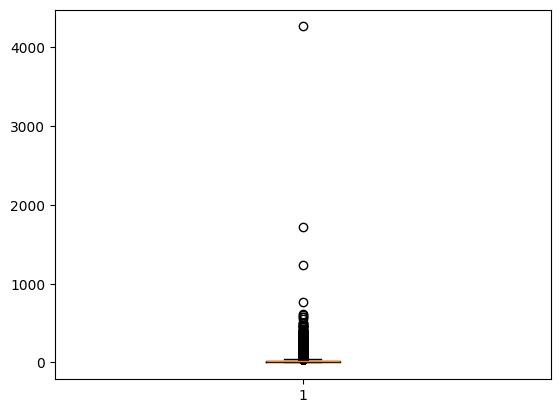

In [23]:
# plt.boxplot(data=df ,x= "payment_type", y="fare_amount")
sns.boxenplot(data=df, x="payment_type", y="fare_amount")

In [24]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5

    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

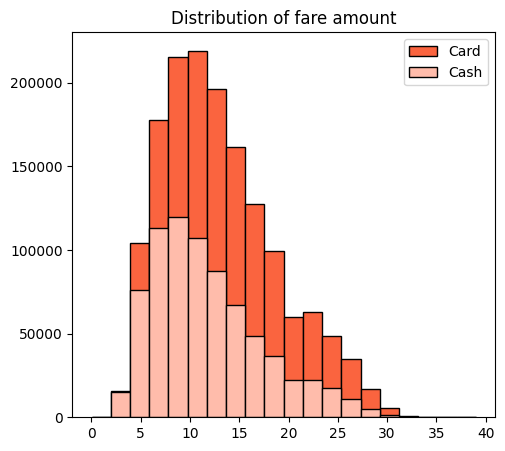

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.legend()
plt.show()

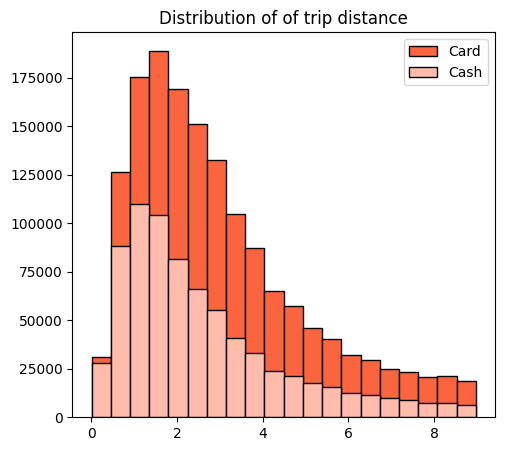

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')
plt.legend()
plt.show()

In [27]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean', 'std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

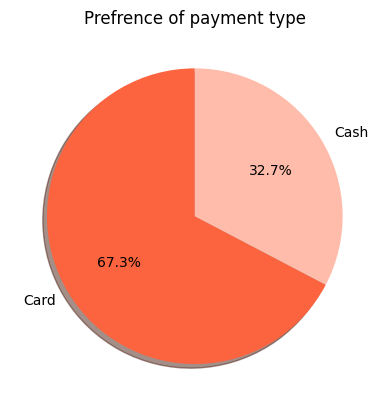

In [28]:
plt.title('Prefrence of payment type')
plt.pie(df['payment_type'].value_counts(), labels=df['payment_type'].value_counts().index,
        startangle=90, shadow=True, autopct='%1.1f%%', colors=['#FB643F', '#FFBCAB'])
plt.show()

In [29]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [31]:
df1=pd.DataFrame(columns=['payment_type', 1,2,3,4,5])
df1['payment_type']=['cash', 'card']
df1.iloc[0,1:] = passenger_count.iloc[:5,-1]
df1.iloc[1,1:] = passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,cash,39.568381,14.2591,5.327106,2.771042,5.398171
1,card,20.042143,6.765806,2.371984,1.423686,2.072581


<Axes: title={'center': 'percentage of passengers per drive '}, ylabel='payment_type'>

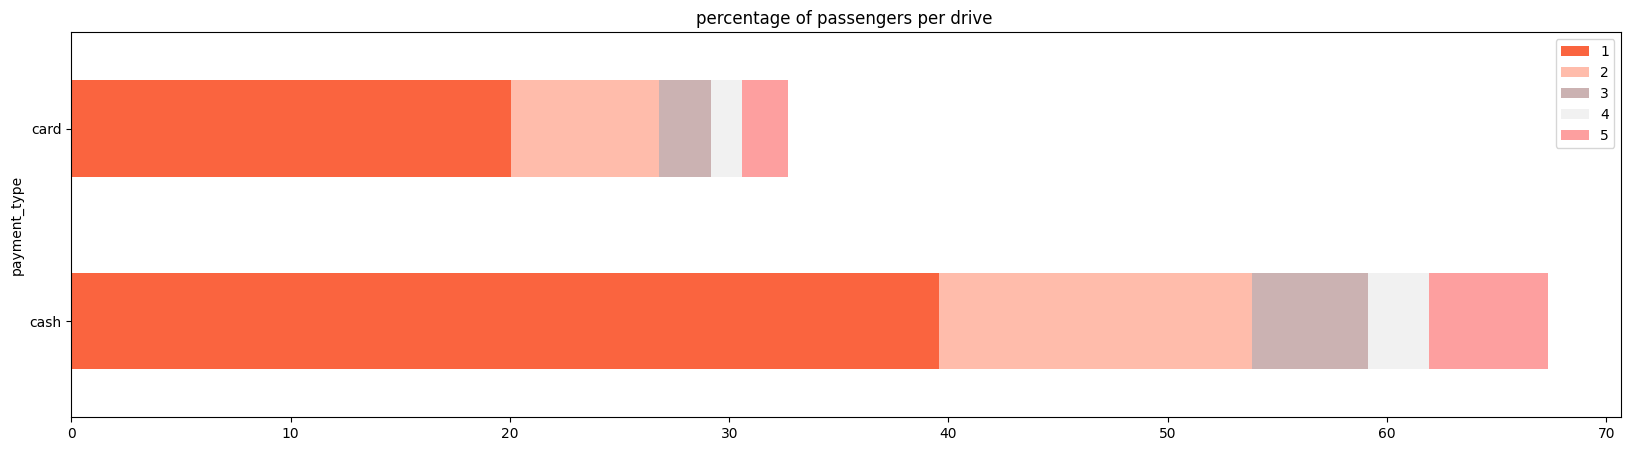

In [44]:
fig, ax = plt.subplots(figsize=(20, 5)) 
df1.plot(x='payment_type', kind='barh', stacked=True, title='percentage of passengers per drive ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )


In [47]:
df[df['payment_type'] == 'Cash']['fare_amount']

5           2.5
11          9.5
15          9.0
17         11.5
18         24.5
           ... 
6339487     6.5
6339503    27.5
6339517    10.5
6339527    12.5
6339529    26.0
Name: fare_amount, Length: 750869, dtype: float64

In [50]:
df[['payment_type', 'fare_amount']]

,payment_type,fare_amount
0,Card,6.0
1,Card,7.0
2,Card,6.0
3,Card,5.5
5,Cash,2.5
...,...,...
6339550,Card,10.5
6339555,Card,10.0
6339561,Card,17.5
6339563,Card,13.0


In [6]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data
data = {
    'Horsepower': [100, 150, 200, 110, 120, 1000],  # Outlier at 1000
    'Displacement': [1.6, 1.8, 2.0, 1.5, 1.7, 10],  # Outlier at 10
    'Cylinder Count': [4, 6, 8, 4, 6, 20]  # Outlier at 20
}

df = pd.DataFrame(data)

# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(df))

# Define a threshold, e.g., 3
threshold = 2

# Find rows where Z-scores are less than the threshold for all features
df_clean = df[(z_scores < threshold).all(axis=1)]

# Output the cleaned data
print("Data after removing outliers:")
print(df_clean)

Data after removing outliers:
   Horsepower  Displacement  Cylinder Count
0         100           1.6               4
1         150           1.8               6
2         200           2.0               8
3         110           1.5               4
4         120           1.7               6
